In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [273]:
data = pd.read_csv("weather-check.csv")
print(data.shape)

(928, 9)


In [274]:
data.head()

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


In [275]:
col_names = ['id','check','cheking way','specific way','smart watch','age','gender','income','region']
data.columns = col_names

In [276]:
data.head()

,id,check,cheking way,specific way,smart watch,age,gender,income,region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


In [277]:
data.tail()

,id,check,cheking way,specific way,smart watch,age,gender,income,region
923,3877568054,Yes,The Weather Channel,-,Very likely,45 - 59,Female,Prefer not to answer,Pacific
924,3877568053,Yes,The default weather app on your phone,-,Very likely,30 - 44,Female,Prefer not to answer,South Atlantic
925,3877566926,Yes,Local TV News,-,Somewhat likely,60+,Female,Prefer not to answer,Pacific
926,3877551536,No,-,-,-,-,-,-,-
927,3877548893,Yes,-,-,-,-,-,-,-


In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            928 non-null    int64 
 1   check         928 non-null    object
 2   cheking way   928 non-null    object
 3   specific way  928 non-null    object
 4   smart watch   928 non-null    object
 5   age           928 non-null    object
 6   gender        928 non-null    object
 7   income        928 non-null    object
 8   region        928 non-null    object
dtypes: int64(1), object(8)
memory usage: 65.4+ KB


In [279]:
data['id'] = data['id'].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            928 non-null    object
 1   check         928 non-null    object
 2   cheking way   928 non-null    object
 3   specific way  928 non-null    object
 4   smart watch   928 non-null    object
 5   age           928 non-null    object
 6   gender        928 non-null    object
 7   income        928 non-null    object
 8   region        928 non-null    object
dtypes: object(9)
memory usage: 65.4+ KB


In [280]:
missing_df = data.isnull().sum().reset_index()
missing_df.columns=['column','count']
missing_df['ratio'] = missing_df['count']/data.shape[0]
missing_df['ratio']!=0

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
Name: ratio, dtype: bool

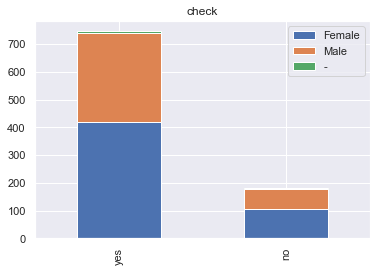

In [281]:
yes = data[data['check']=='Yes']['gender'].value_counts()
no = data[data['check']=='No']['gender'].value_counts()
df1 = pd.DataFrame([yes,no])
df1.index = ['yes','no']
df1.plot(kind='bar',stacked=True)
plt.title('check')
plt.show()

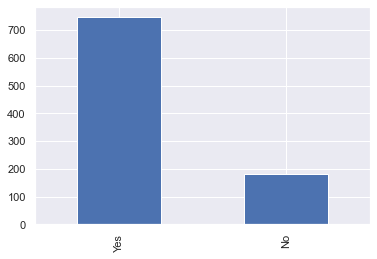

In [282]:
data['check'].value_counts().plot(kind='bar')
plt.show()

In [283]:
category_feature = [col for col in data.columns if data[col].dtypes == object]
print(category_feature)

['id', 'check', 'cheking way', 'specific way', 'smart watch', 'age', 'gender', 'income', 'region']


In [284]:
category_feature = list(set(category_feature) - set(['id','check']))
print(category_feature)

['gender', 'cheking way', 'specific way', 'smart watch', 'age', 'region', 'income']


In [291]:
def bar_chart(feature):
    levels = data[y_colname].unique()
    df1 = pd.DataFrame()
    for i in levels:
        globals()[i] = data[data[y_colname]==i][feature].value_counts()
        df1 = pd.concat([df1,globals()[i]],axis=1)
    df1 = df1.T
    df1.index = ['Yes','No']
    df1.plot(kind='bar',stacked=True)


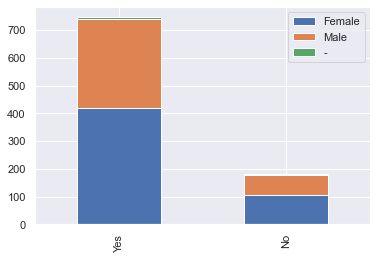

In [292]:
y_colname='check'
bar_chart('gender')

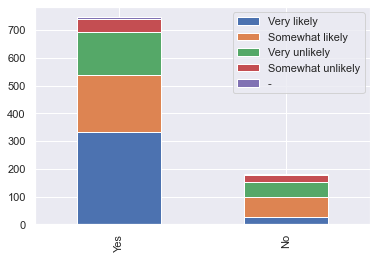

In [293]:
bar_chart(category_feature[3])